In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import scipy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import *
import matplotlib.colors as colors
import openpyxl
from netCDF4 import Dataset
import h5netcdf

In [2]:
## Model MAR
sourceDataGrid='/home/amoryc/'
#fileName_grF='NST.2000.01.01.00.GRa_Fedchenko.nc'
fileName_grM='NST.2000.01.01.00.GRa_Mera.nc_ICEmask'
ds_grM= xr.open_dataset(sourceDataGrid+fileName_grM)


In [3]:
ds_grM

<xarray.Dataset> Size: 15MB
Dimensions:  (time: 1, x: 164, y: 116, level: 24, sector: 2, soil: 7)
Coordinates:
  * time     (time) datetime64[ns] 8B 2000-01-01
  * x        (x) float32 656B -495.0 -490.0 -485.0 -480.0 ... 310.0 315.0 320.0
  * y        (y) float32 464B -195.0 -190.0 -185.0 -180.0 ... 370.0 375.0 380.0
  * level    (level) float32 96B 0.02795 0.04996 0.08021 ... 0.9992 0.9996
  * sector   (sector) float32 8B 1.0 2.0
  * soil     (soil) float32 28B 1.0 2.0 3.0 4.0 5.0 6.0 7.0
Data variables: (12/40)
    DATE     (time) float32 4B ...
    LON      (y, x) float32 76kB ...
    LAT      (y, x) float32 76kB ...
    SH       (y, x) float32 76kB ...
    SOL      (y, x) float32 76kB ...
    TEX      (y, x) float32 76kB ...
    ...       ...
    ZZ       (time, level, y, x) float32 2MB ...
    SP       (time, y, x) float32 76kB ...
    ST       (time, y, x) float32 76kB ...
    SST      (time, y, x) float32 76kB ...
    SIC      (time, y, x) float32 76kB ...
    EWC      (time, y, x) float32 76kB ...
Attributes:
    title:        NESTOR output - Mod: MAR - Exp: GRa - 2000/01/01/00
    institution:  ULg (Xavier Fettweis)
    history:      libUN (2005.04.08) - Tue Jan  7 12:03:46 2025
    netcdf:       4.9.2 of Oct 15 2024 12:29:46 $

In [4]:
##GRf Fedchenko 5km; Gra Mera 5km
##sourceDataOLD='/bettik/amoryc/MARout/GRa/spin3_ICEmask/work/daily/'
#
sourceData='/bettik/amoryc/MARout/GRa/spin3_ICEmask/work/daily/'
variable='TT' ##RF;SF;SHSN3;TT
fileNameM='daily-TT-MAR_ERA5-2003-2013.nc' ##change to monthly
dsM= xr.open_dataset('/bettik/amoryc/MARout/GRa/spin3_ICEmask/work/daily/daily-TT-MAR_ERA5-2003-2013.nc')['TT'][:,0,:,:] ## montlhy mean

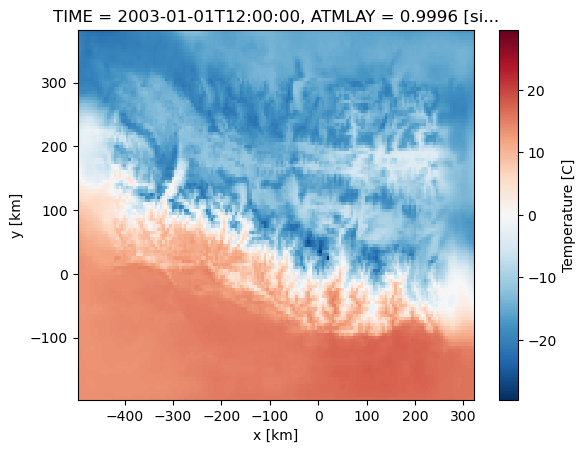

In [5]:
dsM[0,:,:].plot()

In [6]:
###
#AWS-Mera La: Since November 2013 (AWS inserted on firm rocks – off-glacier)
#Location in WGS84, Lat: 27.735°N; Long: 86.900°E; Elevation: 5352.008 m 
#or UTM Zone 45; Easting: 490137.007 m; Northing: 3067850.613 m on 22/11/2020
#Naulek Easting : 489885 m Northing 3065938 m Elevation 5360 m 
#Lat: 27.71772341 Long: 86.89739046
###
lon_Naulek=86.89739046
lat_Naulek=27.71772341
elev_Naulek=5360.000

In [7]:
##Find the pixel of MAR corresponding to station
target_lon = lon_Naulek
target_lat = lat_Naulek

In [8]:
lon=ds_grM.LON
lat=ds_grM.LAT

In [9]:
#len(lon),len(lat)

In [10]:
#Step 2: Find the nearest grid point to target_lon,target_lat
# Compute distance to each grid point
dist = np.sqrt((lon - target_lon)**2 + (lat - target_lat)**2)
print(dist)
j, i = np.unravel_index(dist.argmin(), dist.shape)

<xarray.DataArray (y: 116, x: 164)> Size: 76kB
array([[5.279424 , 5.232181 , 5.184988 , ..., 3.5881248, 3.631921 ,
        3.6758704],
       [5.265635 , 5.21825  , 5.1709113, ..., 3.566808 , 3.610866 ,
        3.6551087],
       [5.252194 , 5.2046523, 5.1571703, ..., 3.5459263, 3.590265 ,
        3.6347723],
       ...,
       [6.09539  , 6.0520864, 6.0089116, ..., 4.6114783, 4.647657 ,
        4.6841164],
       [6.1210732, 6.0779243, 6.034923 , ..., 4.644426 , 4.6803765,
        4.7166038],
       [6.1469765, 6.103999 , 6.061146 , ..., 4.6775894, 4.713296 ,
        4.7493043]], shape=(116, 164), dtype=float32)
Coordinates:
  * x        (x) float32 656B -495.0 -490.0 -485.0 -480.0 ... 310.0 315.0 320.0
  * y        (y) float32 464B -195.0 -190.0 -185.0 -180.0 ... 370.0 375.0 380.0


39 99
<xarray.DataArray 'TT' ()> Size: 4B
[1 values with dtype=float32]
Coordinates:
    TIME     datetime64[ns] 8B 2003-01-01T12:00:00
    X        float32 4B -300.0
    Y        float32 4B 300.0
    ATMLAY   float32 4B 0.9996
Attributes:
    cell_methods:  TIME: mean
    history:       From ICE.a00.2003.01.01-31
    long_name:     Temperature
    units:         C


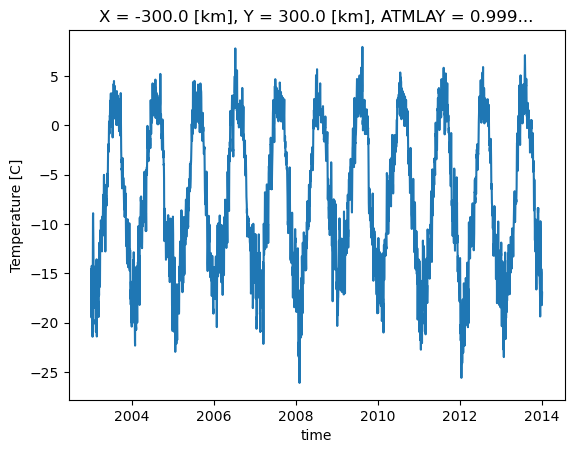

In [11]:
print(j,i) #x=i; y=j
print(dsM[0,i,j])
#dsM_sta=dsM[:, i, j]
dsM[:,i,j].plot()

In [12]:
#Step 3: Extract data at that location
# For a single time step
#value = dsM['SH'].isel(y=j, x=i)
## If there's a time dimension
dsM_sta=dsM[:, i, j]
dsM_sta_new= dsM_sta.rename({'TIME': 'time'})
#units=dsM.units
dsM_sta_new

<xarray.DataArray 'TT' (time: 4018)> Size: 16kB
[4018 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 32kB 2003-01-01T12:00:00 ... 2013-12-31T12...
    X        float32 4B -300.0
    Y        float32 4B 300.0
    ATMLAY   float32 4B 0.9996
Attributes:
    cell_methods:  TIME: mean
    history:       From ICE.a00.2003.01.01-31
    long_name:     Temperature
    units:         C

In [13]:
##Tip: Use xarray with .sel() 
#if your dataset already includes lat and lon coordinates (not just x/y):
##ds.sel(lat=target_lat, lon=target_lon, method='nearest')

In [14]:
#dsM_sta[0:3].TIME

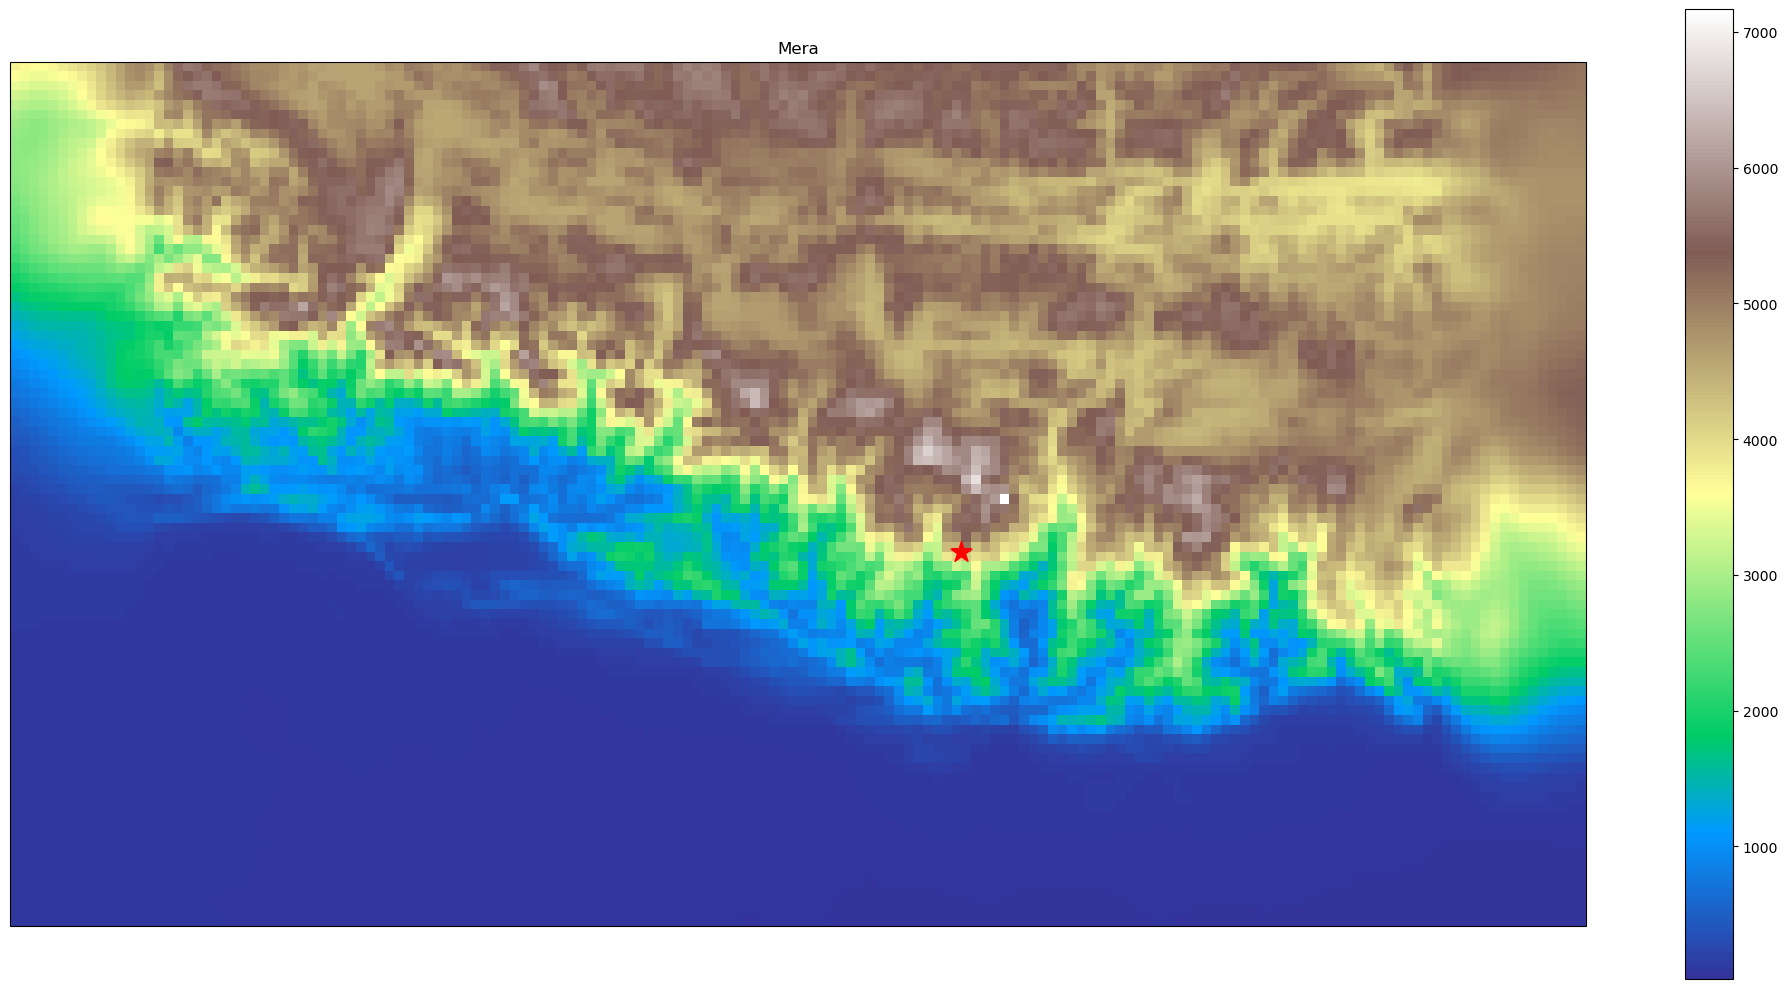

In [15]:
##
fig, axs = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(20,10))
cmap='terrain'

m1=axs.pcolormesh(ds_grM.SH,cmap=cmap)
axs.scatter(i,j,s=250,marker='*',color='red',linewidths=1.,edgecolors='red') #vérifier si coordonées sont dans le bon référenciel.

axs.set_title('Mera')
fig.colorbar(m1,orientation='vertical')

#ax1.set_title('contourf with levels')
fig.tight_layout()

plt.show()

In [16]:
####
## Opening station data
####

In [17]:
path="/bettik/PROJECTS/pr-regional-climate/santolam/glacioclim/donnees_meteo/Naulekfinal2012_24.xlsx"
xl_data=pd.ExcelFile(path)                           
#print(xl_data)  

In [18]:
df= {sheet_name: xl_data.parse(sheet_name)     
       for sheet_name in xl_data.sheet_names}
Data=df['Naulekfinal2012_24']                  
NameVars=['Time','Tairlow','RHlow','Tairhight','RHhight','u','Direction','SWin','SWout','LWincor','LWoutcor','Abl/acc dist sensor surf','tilt metter XAXIS','tilt meter YAXIX']
UnitVars=['data/hour','C','%','C','%','m/s','degrees','W/m2','W/m2','W/m2','W/m2','m','degrees','degrees']

##Define new DataFrame and changing name of columns
dfile= pd.DataFrame(data=Data.loc[4:]) 
df=pd.DataFrame(dfile.values, columns=NameVars) 
### Opening one column + converting into an array
Tairlow_ar=[float(i) for i in df.Tairlow.values]   #Convertit les données en float utilisables 
Tairhight_ar=[float(i) for i in df.Tairhight.values] 

In [19]:
#Pour l'utilisation des données avec xarray, redéfinitions des variables en prenant en compte la fréquence à laquelle les données sont prises ( ici 30 min ) 
def NewTime(
        NameVar,
        Var_ar,
        freq):
    start, end = df.Time.values[0], df.Time.values[-1]
    time = pd.date_range(start, end, freq=freq)
    ds = xr.Dataset({NameVar: ("time",np.asarray(Var_ar)), "time": time})
    return ds 
    
Tlow=NewTime('Tairlow',Tairlow_ar,'30min')
Thight=NewTime('Tairhight',Tairhight_ar,'30min')

In [20]:
T=xr.Dataset()
T['Tair']=((Tlow.Tairlow+Thight.Tairhight)/2)

In [23]:
daily_meanT=T.resample(time='D').mean()

monthly_meanT=daily_meanT.resample(time='ME').mean()   

yearly_meanT=monthly_meanT.resample(time='YE').mean()

In [24]:
#Définition des Saisons, et création d'une fonction qui définit les saisons en fonction des périodes des moussons:
seasons = {
	'MAM': [3, 4, 5],  	
	'JJAS': [6, 7, 8, 9],  
	'ON': [10, 11],    	
	'DJF': [12, 1, 2]  	
}
def seasonsdata(ds, season_name): 
	x = seasons[season_name]
	return ds.sel(time=ds['time'].dt.month.isin(x))


In [26]:
# Get the time coordinates
time1 = daily_meanT['time']
time2 = dsM_sta_new['time'] # début 2003-01-01T12 fin 2013-12-31T12

start=time1[0] #2012-11-27 et time1[-1]= #2024-11-26
end=time2[-1] 

In [27]:
ts_sta=daily_meanT.sel(time=slice(start,end))

ts_MAR=dsM_sta_new.sel(time=slice(start,end))

In [49]:
ts_MARnew= ts_MAR.assign_coords(time=(ts_sta.time))

<Figure size 1000x600 with 0 Axes>

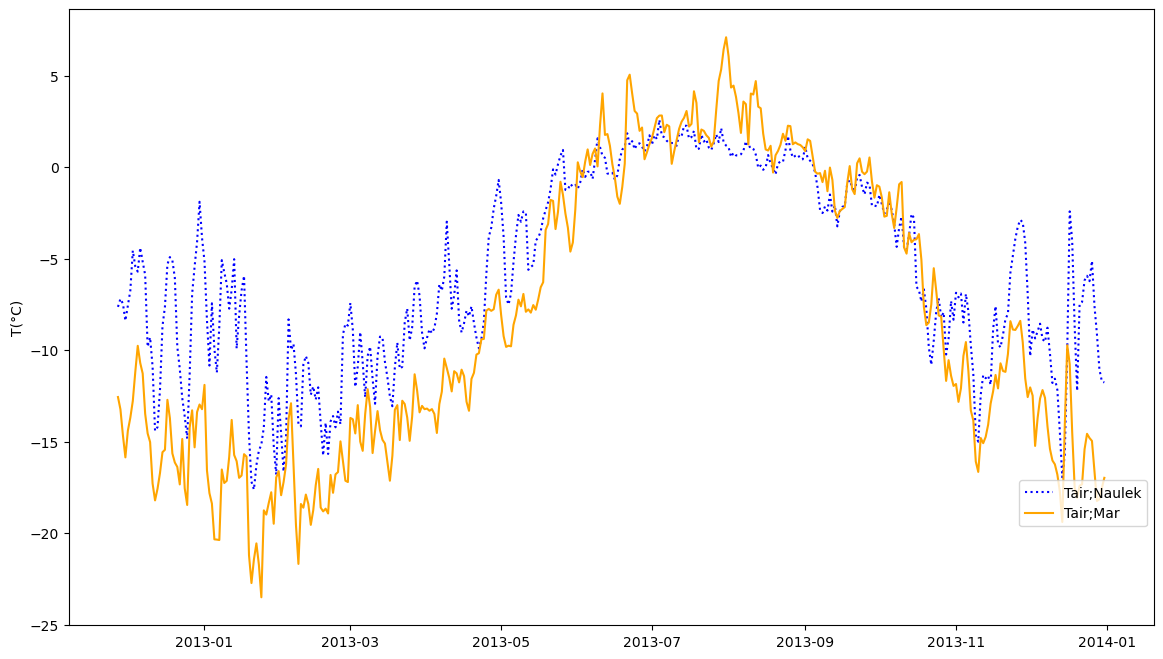

In [50]:
fig=plt.figure(figsize=(10,6))
## Create figure and axis #1
fig, ax1 = plt.subplots(figsize=(14,8))

plt.plot(ts_sta.time, ts_sta['Tair'].values,
         color='blue',linestyle=':',label='Tair;'+'Naulek')
plt.plot(ts_MARnew.time,ts_MARnew.values,
         color='orange',label='Tair;'+'Mar')
ax1.set_ylabel('T(°C)')
#ax1.set_ylim(5, 7)
fig.legend(bbox_to_anchor=(0.4, -0.2, 0.5, 0.5)) #bbox (x, y, width, height) 


<Figure size 1000x600 with 0 Axes>

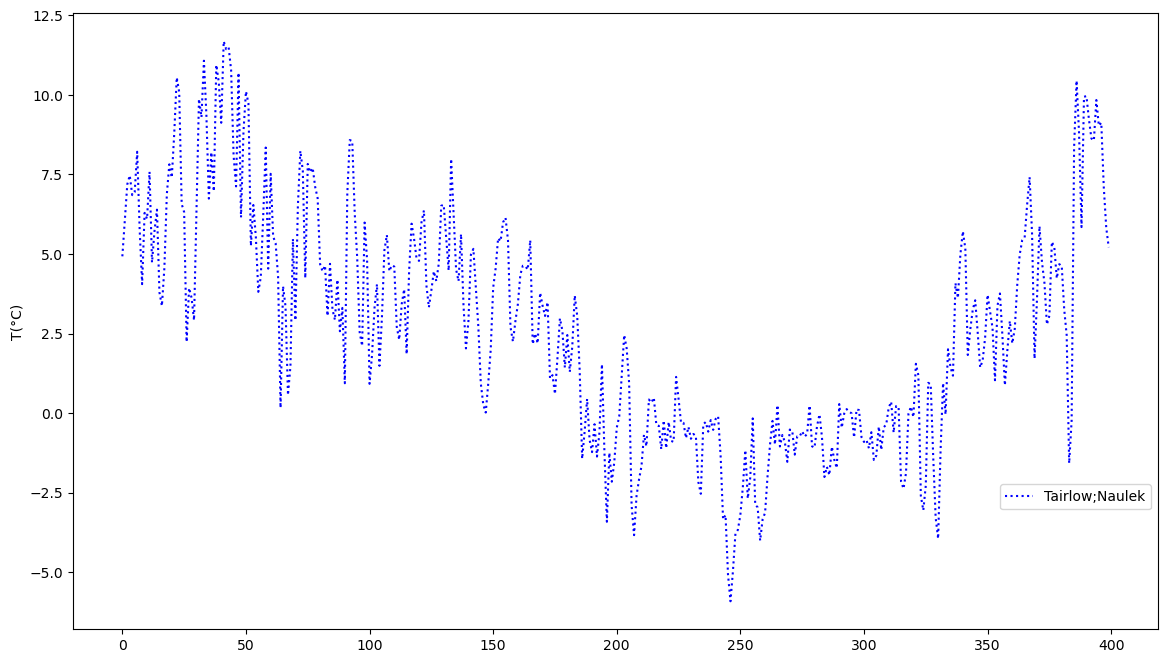

In [51]:
fig=plt.figure(figsize=(10,6))
## Create figure and axis #1
fig, ax1 = plt.subplots(figsize=(14,8))

plt.plot(ts_sta.Tair- ts_MARnew.values,
         color='blue',linestyle=':',label='Tairlow;'+'Naulek')
ax1.set_ylabel('T(°C)')

ax1.set_ylabel('T(°C)')
#ax1.set_ylim(5, 7)
fig.legend(bbox_to_anchor=(0.4, -0.2, 0.5, 0.5)) #bbox (x, y, width, height) 


In [34]:
#MAR saisonier
ts_MAR_premon = seasonsdata(ts_MAR, 'MAM').resample(time='D').mean()

ts_MAR_mon = seasonsdata(ts_MAR, 'JJAS').resample(time='D').mean()

ts_MAR_postmon = seasonsdata(ts_MAR, 'ON').resample(time='D').mean()

ts_MAR_hiver = seasonsdata(ts_MAR, 'DJF').resample(time='D').mean()

In [37]:
#Tlow saisonier
T_premon = seasonsdata(daily_meanT, 'MAM') .resample(time='D').mean()

T_mon = seasonsdata(daily_meanT, 'JJAS').resample(time='D').mean()

T_postmon =  seasonsdata(daily_meanT, 'ON').resample(time='D').mean()

T_hiver  = seasonsdata(daily_meanT, 'DJF').resample(time='D').mean()


In [38]:
ts_stal_premon=T_premon.sel(time=slice(start,end))
ts_stal_mon=T_mon.sel(time=slice(start,end))
ts_stal_postmon=T_postmon.sel(time=slice(start,end))
ts_stal_hiver=T_hiver.sel(time=slice(start,end))


In [39]:
slice(start,end)

slice(<xarray.DataArray 'time' ()> Size: 8B
array('2012-11-27T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2012-11-27, <xarray.DataArray 'time' ()> Size: 8B
array('2013-12-31T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2013-12-31T12:00:00
    X        float32 4B -300.0
    Y        float32 4B 300.0
    ATMLAY   float32 4B 0.9996
Attributes:
    standard_name:  time
    long_name:      time
    bounds:         TIME_bnds
    axis:           T
    cell_methods:   TIME: mean, None)

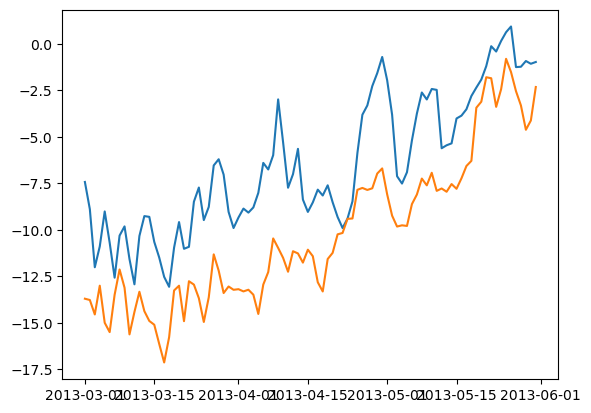

In [41]:

plt.plot(ts_stal_premon.time, ts_stal_premon.Tair)
plt.plot(ts_MAR_premon.time, ts_MAR_premon.values)

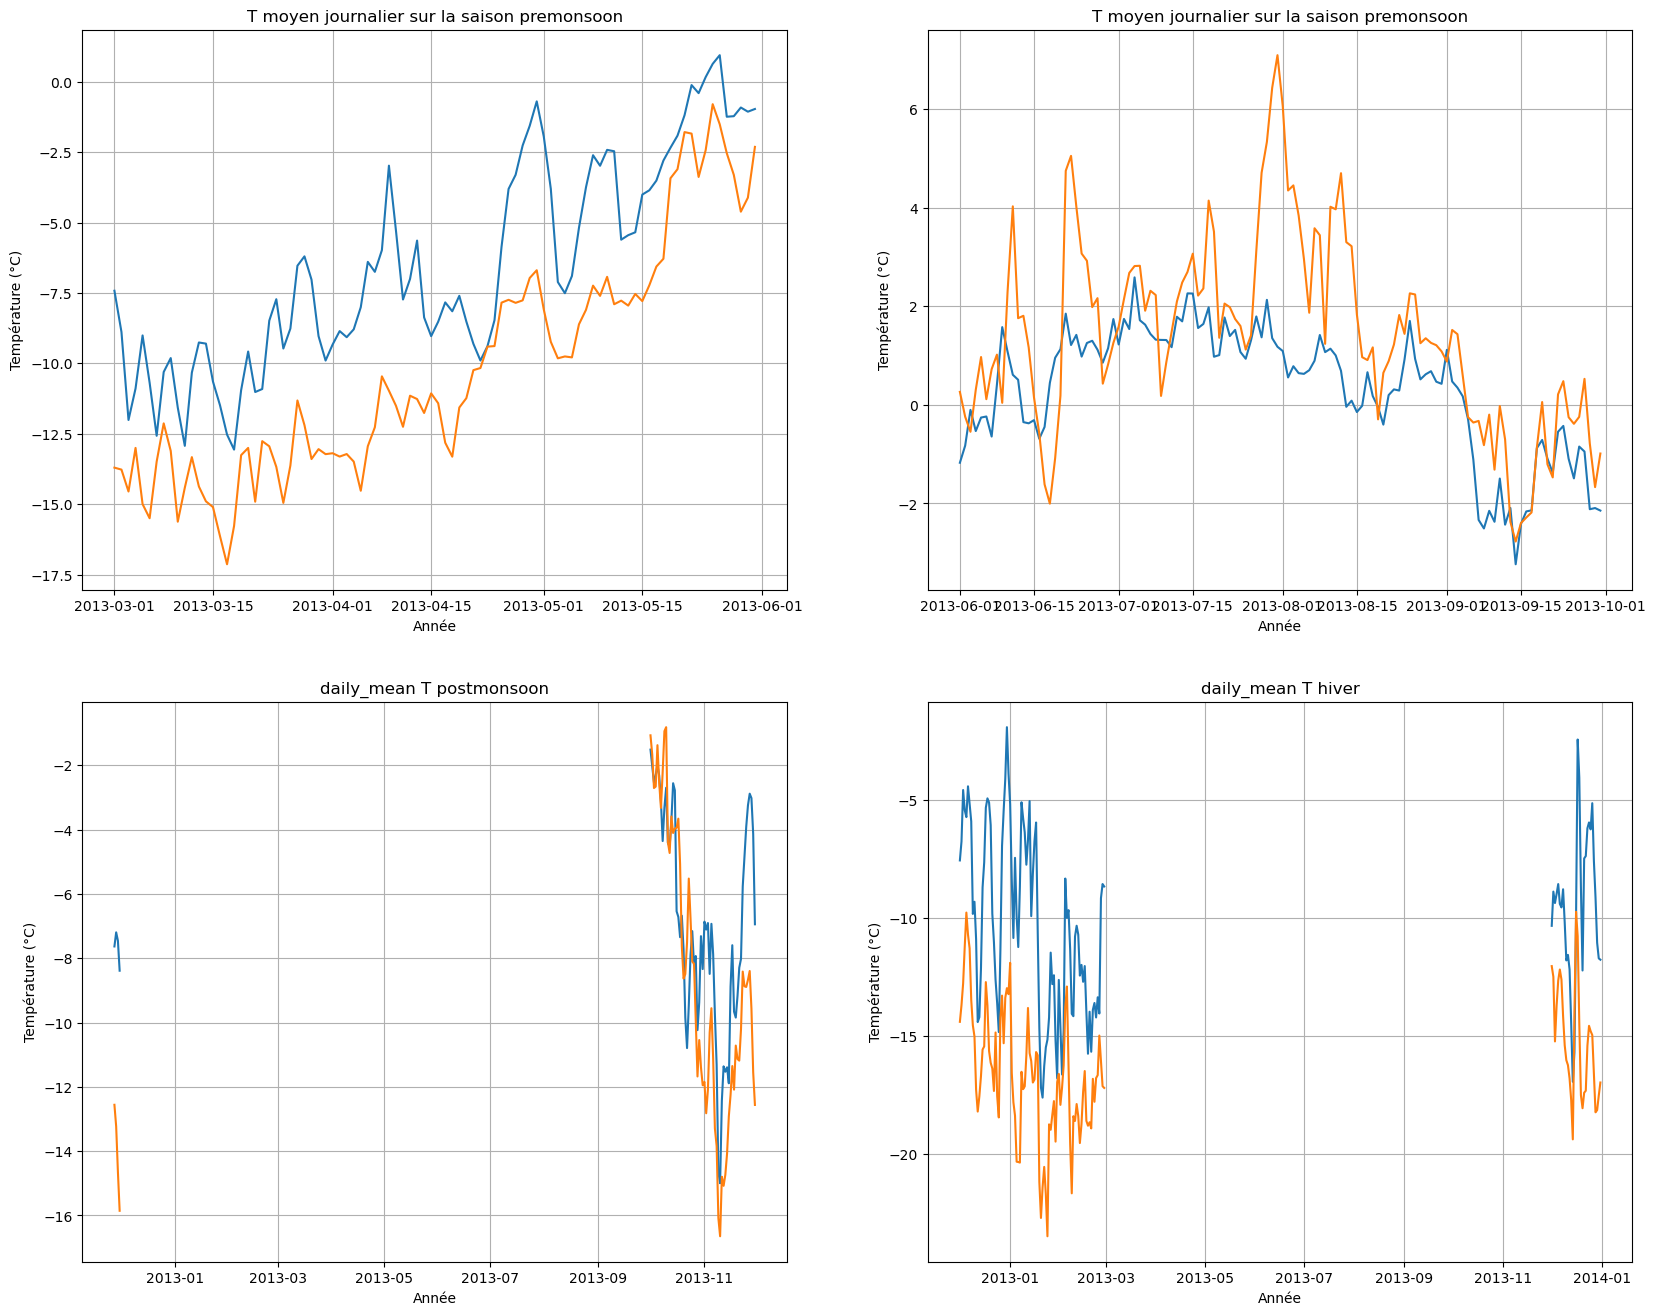

In [43]:
fig, ((ax1,ax2) , (ax3,ax4)) = plt.subplots(2,2, figsize=(20,16))
ax1.plot(ts_stal_premon.time, ts_stal_premon.Tair)
ax1.plot(ts_MAR_premon.time, ts_MAR_premon.values)
ax1.set_title('T moyen journalier sur la saison premonsoon')
ax1.set_xlabel('Année')
ax1.set_ylabel('Température (°C)')
ax1.grid()


ax2.plot(ts_stal_mon.time, ts_stal_mon.Tair)
ax2.plot(ts_MAR_mon.time, ts_MAR_mon.values) 
ax2.set_title('T moyen journalier sur la saison premonsoon')
ax2.set_xlabel('Année')
ax2.set_ylabel('Température (°C)')
ax2.grid()


ax3.plot(ts_stal_postmon.time, ts_stal_postmon.Tair)
ax3.plot(ts_MAR_postmon.time, ts_MAR_postmon.values)
ax3.set_title('daily_mean T postmonsoon')
ax3.set_xlabel('Année')
ax3.set_ylabel('Température (°C)')
ax3.grid()




ax4.plot(ts_stal_hiver.time, ts_stal_hiver.Tair)
ax4.plot(ts_MAR_hiver.time, ts_MAR_hiver.values)
ax4.set_title('daily_mean T hiver')
ax4.set_xlabel('Année')
ax4.set_ylabel('Température (°C)')
ax4.grid()

In [44]:
SH_sta=elev_Naulek

In [45]:
value = ds_grM['SH'].isel(y=j, x=i)
value.values,SH_sta

(array(5064.1274, dtype=float32), 5360.0)

In [46]:
SH_sta-value.values

np.float32(295.87256)

In [47]:
print('MeraLaelevdiff=',5352.008-value.values)
print('MerraSummitelevdif=',6351.252-value.values)

MeraLaelevdiff= 287.88037
MerraSummitelevdif= 1287.1245


<xarray.DataArray (y: 116, x: 164)> Size: 76kB
array([[5.287968 , 5.240772 , 5.1936255, ..., 3.5945985, 3.6382864,
        3.6821296],
       [5.274055 , 5.2267156, 5.179424 , ..., 3.5731022, 3.6170528,
        3.6611905],
       [5.2604895, 5.2129927, 5.165556 , ..., 3.5520382, 3.5962706,
        3.640674 ],
       ...,
       [6.0885305, 6.0451493, 6.001897 , ..., 4.597399 , 4.633663 ,
        4.670207 ],
       [6.1141167, 6.0708904, 6.0278106, ..., 4.6302786, 4.666314 ,
        4.702625 ],
       [6.1399245, 6.0968695, 6.0539374, ..., 4.6633754, 4.6991653,
        4.735257 ]], shape=(116, 164), dtype=float32)
Coordinates:
  * x        (x) float32 656B -495.0 -490.0 -485.0 -480.0 ... 310.0 315.0 320.0
  * y        (y) float32 464B -195.0 -190.0 -185.0 -180.0 ... 370.0 375.0 380.0
40 99
<xarray.DataArray 'TT' ()> Size: 4B
[1 values with dtype=float32]
Coordinates:
    TIME     datetime64[ns] 8B 2003-01-01T12:00:00
    X        float32 4B -295.0
    Y        float32 4B 300.0
    ATMLA

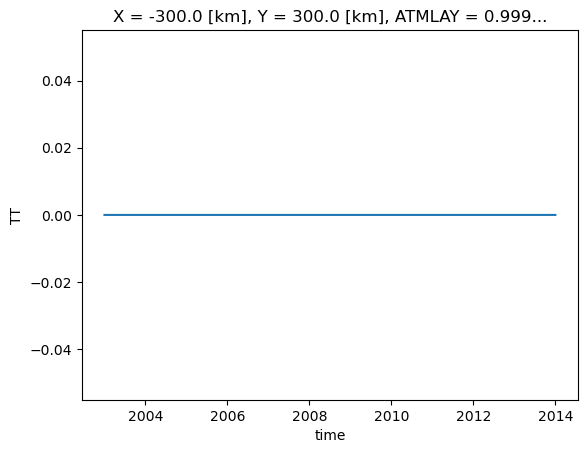

In [48]:
lon_MeraLa=86.900
lat_MeraLa=27.735
elev_MeraLa=5352.008
target_lon = lon_MeraLa
target_lat = lat_MeraLa
lon=ds_grM.LON
lat=ds_grM.LAT
dist = np.sqrt((lon - target_lon)**2 + (lat - target_lat)**2)
print(dist)
j, i = np.unravel_index(dist.argmin(), dist.shape)
print(j,i) #x=i; y=j
print(dsM[0,i,j])
#dsM_sta=dsM[:, i, j]
#Step 3: Extract data at that location
# For a single time step
#value = dsM['SH'].isel(y=j, x=i)
## If there's a time dimension
dsM_sta2=dsM[:, i, j]
dsM_sta_new2= dsM_sta.rename({'TIME': 'time'})
#units=dsM.units
(dsM_sta_new-dsM_sta_new2).plot()